# Import libraries and dataset 

In [1]:
# basic modules
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings

# scikit-learn
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

#settings
warnings.filterwarnings('ignore')
rs = 42

In [2]:
df = pd.read_csv('data/mimic_clean.csv')

# Check Datatypes

In [1]:
df.info()

NameError: name 'df' is not defined

Change 'gender' to 'ismale': 1= True, 0= False

In [ ]:
df['ismale'] = df.gender.apply(lambda x: 1 if x == 'M' else 0)

In [ ]:
df.ismale.unique()

In [ ]:
df.drop('gender', axis=1, inplace=True)

In [ ]:
Feature_new = pd.get_dummies(df.last_careunit, prefix="icu", drop_first=True)
df = pd.concat([df, Feature_new],axis=1)

In [ ]:
df.drop('last_careunit', axis=1, inplace=True)

# Feature Correlations

In [3]:
df.columns

Index(['label', 'hadm_id', 'icustay_id', 'gender', 'age', 'numb_diagn',
       'last_careunit', 'tracheo', 'PaO2', 'base_excess', 'creatinin', 'hb',
       'hct', 'pH', 'FiO2', 'PEEP', 'SaO2', 'blood_pr', 'hr', 'lactic_acid',
       'leuko', 'mean_insp_pr', 'resp_rat', 'tidal_vol', 'breath_min_vol'],
      dtype='object')

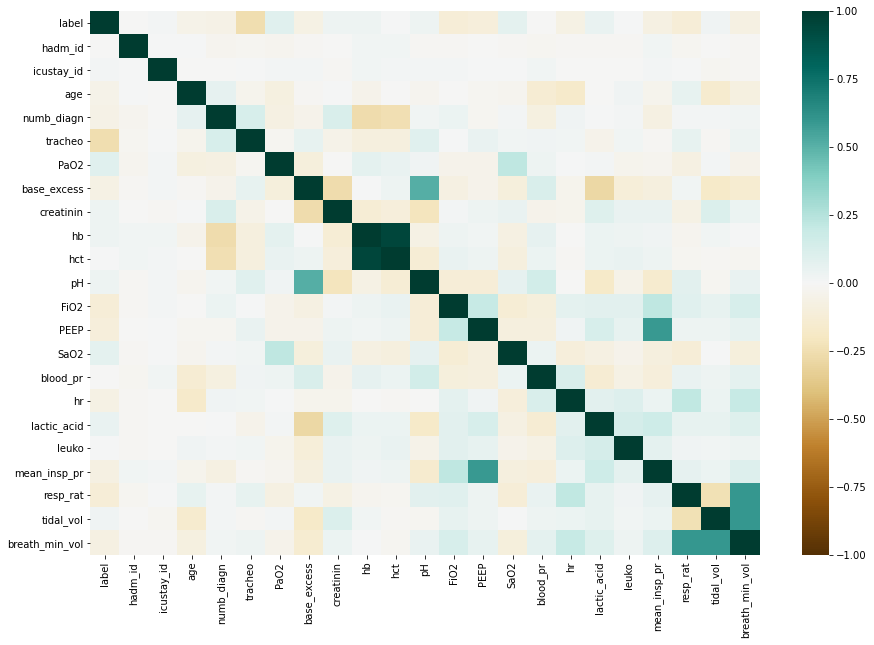

In [4]:
plt.figure(figsize=(15,10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix,cmap="BrBG",annot=False, vmin=-1, vmax=1);

Because hemoglobin und hematocrit are strongly correlated statistically as well as biologically, we decide to drop one. In our case hematocrit as we believe it to be less researched than hemoglobin. 

In [5]:
df.drop('hct', axis=1, inplace=True)

In [6]:
c = df.corr().abs()
s = c.unstack()
so = s.sort_values(kind="quicksort", ascending=False)

In [7]:
so[so < 1].head(15)

tidal_vol       breath_min_vol    0.597442
breath_min_vol  tidal_vol         0.597442
resp_rat        breath_min_vol    0.596016
breath_min_vol  resp_rat          0.596016
PEEP            mean_insp_pr      0.592371
mean_insp_pr    PEEP              0.592371
base_excess     pH                0.514932
pH              base_excess       0.514932
base_excess     lactic_acid       0.282186
lactic_acid     base_excess       0.282186
base_excess     creatinin         0.263671
creatinin       base_excess       0.263671
hb              numb_diagn        0.262559
numb_diagn      hb                0.262559
label           tracheo           0.254714
dtype: float64

# Save Dataframe for Modelling

In [17]:
df.to_csv('data/mimic_premodel.csv', index=False)